<H1> PROJET MACHINELEARNING 2 </H1>
<H2>Classification d'Images avec KERAS</>





## Installation


In [ ]:


!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel



     |████████████████████████████████| 86 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 30.8 MB/s 
     |████████████████████████████████| 15.8 MB 15.0 MB/s 
     |████████████████████████████████| 76 kB 5.4 MB/s 
     |████████████████████████████████| 132 kB 51.9 MB/s 
     |████████████████████████████████| 802 kB 41.5 MB/s 
     |████████████████████████████████| 793 kB 40.9 MB/s 
     |████████████████████████████████| 793 kB 18.9 MB/s 
     |████████████████████████████████| 791 kB 53.2 MB/s 
     |████████████████████████████████| 786 kB 50.4 MB/s 
     |████████████████████████████████| 779 kB 55.6 MB/s 
     |████████████████████████████████| 778 kB 41.6 MB/s 
     |████████████████████████████████| 776 kB 40.9 MB/s 
     |████████████████████████████████| 769 kB 44.4 MB/s 
     |████████████████████████████████| 766 kB 53.7 MB/s 
     |████████████████████████████████| 1.0 MB 27.1 MB/s 
     |████████████████████████████████| 722 kB 52.7 MB/s 
     |███████████

In [ ]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# librairies générales
import pickle 
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys
import copy


# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# TensorFlow et keras
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import BatchNormalization
import keras
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from tqdm import tqdm
from keras.models import load_model

# Umap 
import umap.plot

In [ ]:
def plot_curves_confusion (history,confusion_matrix,class_names):
  plt.figure(1,figsize=(16,6))
  plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,
                          top = 0.9, wspace = 0.25, hspace = 0)

  # division de la fenêtre graphique en 1 ligne, 3 colonnes,
  # graphique en position 1 - loss fonction

  plt.subplot(1,3,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Training loss', 'Validation loss'], loc='upper left')
  # graphique en position 2 - accuracy
  plt.subplot(1,3,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
  
  # matrice de correlation
  plt.subplot(1,3,3)
  sns.heatmap(conf,annot=True,fmt="d",cmap='Blues',xticklabels=class_names, yticklabels=class_names)# label=class_names)
  # labels, title and ticks
  plt.xlabel('Predicted', fontsize=12)
  #plt.set_label_position('top') 
  #plt.set_ticklabels(class_names, fontsize = 8)
  #plt.tick_top()
  plt.title("Correlation matrix")
  plt.ylabel('True', fontsize=12)
  #plt.set_ticklabels(class_names, fontsize = 8)
  plt.show()

Pour pouvoir sauvegarder sur votre répertoire Google Drive, il est nécessaire de fournir une autorisation. Pour cela il suffit d'éxecuter la ligne suivante et de saisir le code donné par Google.

In [ ]:
# pour monter son drive Google Drive local
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Corriger éventuellement la ligne ci-dessous pour mettre le chemin vers un répertoire spécifique dans votre répertoire Google Drive : 

In [ ]:
import sys
my_local_drive='/content/gdrive/My Drive/ML2'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/My Drive/ML2


'/content/gdrive/My Drive/ML2'

# Le jeu de données CIFAR10

Le jeu de données à utiliser est CIFAR10 le dataset est au format (32 x 32 x 3 ) pixels

In [ ]:
ciafr10_data = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = ciafr10_data.load_data()

170508288/170498071 [==============================] - 6s 0us/step


Numero Label [1]


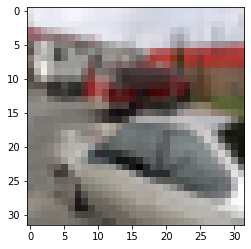

In [ ]:
# Un petit apperçu
print("Numero Label "+str(train_labels[49999]))
plt.imshow(train_images[49999],cmap=plt.cm.binary)

<H2>Affichage des informations sur les données du datset CIFAR10.</H>


Nombre d'exemples du jeu d'apprentissage :  50000
Format du jeu d'apprentissage :  (50000, 32, 32, 3)
Format des labels pour le jeu d'apprentissage' :  [6 9 9 ... 9 1 1] 

Nombre d'exemples du jeu de test :  10000
Nombre de features du jeu de test :  32
Format des labels pour le jeu de test :  (10000, 1) 

Exemple de labels [6] 

Distribution des labels dans le jeu d'apprentissage


Text(0.5, 1.0, "Nombre d'éléments par classe")

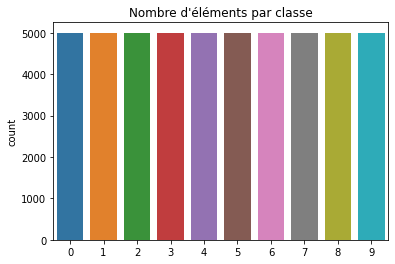

In [ ]:
print("Nombre d'exemples du jeu d'apprentissage : ", train_images.shape[0])
print ("Format du jeu d'apprentissage : ", train_images.shape)
print("Format des labels pour le jeu d'apprentissage' : ", train_labels.reshape(-1,), '\n')
print("Nombre d'exemples du jeu de test : ", test_images.shape[0])
print ("Nombre de features du jeu de test : ", test_images.shape[1])
print("Format des labels pour le jeu de test : ", test_labels.shape, '\n')
print ("Exemple de labels",train_labels[0], '\n')
print ("Distribution des labels dans le jeu d'apprentissage")
sns.countplot(train_labels.reshape(-1,))
plt.title("Nombre d'éléments par classe")

Nous pouvons voir sur le graphique ci-dessus que le jeu de données d'apprentissage comporte 50 000 elements qui sont distribués à égalité sur les 10 classes(labels)

Comme les labels sont encodés de 0 à 9, nous créons une classe pour labeliser les images. 

In [ ]:
print ("Création d'une classe pour pouvoir labéliser les images lors de l'affichage")
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck',]

Création d'une classe pour pouvoir labéliser les images lors de l'affichage


In [ ]:
len(class_names)

10

Visulaisation de quelques images du dataset

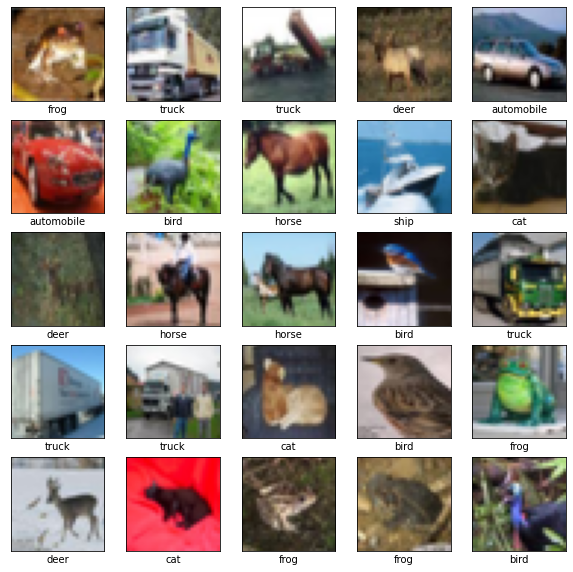

In [ ]:
#Visualisation d'images
plt.figure(figsize=(10,10))
columns = 25
for i in range(columns):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_labels[i])])

### Visualisation des données



In [ ]:
# reshape pour pouvoir afficher 
nb_images=1000
print ("Sélection de ",nb_images," images de train_images à visualiser")
print ("Forme du jeu de données à visualiser",train_images[:nb_images].shape)
train_images_reshaped = train_images[:nb_images].reshape((nb_images, 32 * 32 *3))
print ("Forme du jeu de données après reshape (transformation en vecteur)",train_images_reshaped.shape)

# Definition des données à afficher
X_plot = train_images_reshaped[:nb_images]
y_plot = train_labels.reshape(-1,)[:nb_images]
label_dictionnary = {
        0:'airplane',
        1:'automobile',
        2:'bird',
        3:'cat',
        4:'deer',
        5:'dog',
        6:'frog',
        7:'horse',
        8:'ship',
        9:'truck',
    }

def true_label(x):
    return label_dictionnary[x]    


Target_names=[]
for i in range(0,nb_images):
  Target_names=np.append(Target_names,true_label(y_plot[i]))    

Sélection de  1000  images de train_images à visualiser
Forme du jeu de données à visualiser (1000, 32, 32, 3)
Forme du jeu de données après reshape (transformation en vecteur) (1000, 3072)


Utilisation de PCA :

In [ ]:
# Utilisation de PCA
pca = PCA(n_components=2)
pca.fit(X_plot)
X_pca = pca.transform(X_plot)

trace0 = go.Scatter(
    x = X_pca[:,0],
    y = X_pca[:,1],
    mode = 'markers',
    text = Target_names,
    showlegend = False,
    marker = dict(
        size = 8,
        color = y_plot,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

Nous pouvons constater qu'avec PCA il n'est pas facile de voir les différentes classes.  

Utilisation de TSNE : 

In [ ]:
# Utilisation de TSNE
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_plot) 

traceTSNE = go.Scatter(
    x = tsne_results[:,0],
    y = tsne_results[:,1],
    text = Target_names,
    mode = 'markers',
    showlegend = True,
    marker = dict(
        size = 8,
        color = y_plot,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceTSNE]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False,

             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

### Pré-traitement des données

Inspection d'une image en affichant les valeurs des pixels :

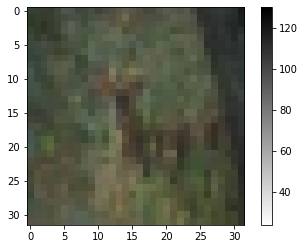

In [ ]:
numimage=10
plt.figure()
plt.imshow(train_images[numimage], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
#plt.xlabel(class_names[train_labels[numimage]])
plt.show()

**Transformation des donnees**  
Normalisation des données pour obtenir des valeurs situées entre 0 et 1. 

In [ ]:
# Sauvegarde des données avant transformation
train_images_original=copy.deepcopy(train_images)
test_images_original=copy.deepcopy(test_images)

train_images = train_images / 255.0
test_images = test_images / 255.0

Affichage pour vérifier que la transformation a bien été réalisée.

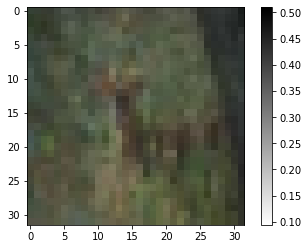

In [ ]:
numimage=10
plt.figure()
plt.imshow(train_images[numimage], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
#plt.xlabel(class_names[train_labels[numimage]])
plt.show()

## Un modèle "traditionnel"


Dans cette section, nous utilisons un classifier "traditionnel", i.e. ceux que nous avons l'habitude d'utiliser précédemment. En fait, il s'agit ici de créer un modèle baseline afin de pouvoir avoir une comparaison.   

Pour rappel, comme l'image est une matrice, il est d'abord nécessaire de l'"applatir", i.e. de la transformer en vecteur. Par la suite comme il y a beaucoup de features, nous utiliserons une PCA pour réduire le nombre de dimensions. Enfin nous utilisons un simple modèle Naïve Bayes.   

De manière à ne pas être biaisé par la répartition des données, il est important de faire une cross validation. 

In [ ]:
seed=7
nb_splits=10
k_fold = KFold(n_splits=nb_splits, shuffle=True, random_state=seed)

pipe = Pipeline([('pca',PCA(n_components=100)),
                 ('clf',GaussianNB())])

scoring = 'accuracy'
# transformation des données d'entrainement en vecteur
train_images_reshaped = train_images.reshape((train_images.shape[0], 32 * 32 *3))

print ("Evaluation de ",pipe["clf"], " sur ", nb_splits, " splits")
score = cross_val_score(pipe, train_images_reshaped, train_labels, cv=k_fold, scoring=scoring)

print('Les différentes accuracy pour les ",nb_splits, " évaluations sont : \n',
      score,'\n')
print ('Accuracy moyenne : %0.3f'%(score.mean()), 
       ' standard deviation %0.3f'%(score.std()))

# prediction sur les données de test
# attention ne pas oublier de faire un pipe.fit pour créer le modèle final
pipe.fit(train_images_reshaped, train_labels)

# transformation des données de test en vecteur au lieu de matrice
test_images_reshaped=test_images.reshape((test_images.shape[0], 32 * 32 *3))
y_predicted = pipe.predict(test_images_reshaped)

print("Accuracy sur le jeu de test", accuracy_score(test_labels, y_predicted))

Evaluation de  GaussianNB()  sur  10  splits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConv

Les différentes accuracy pour les ",nb_splits, " évaluations sont : 
 [0.3202 0.3466 0.337  0.3424 0.323  0.3424 0.3446 0.3432 0.3322 0.347 ] 

Accuracy moyenne : 0.338  standard deviation 0.009


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy sur le jeu de test 0.3372


Il est clair que Naïve Bayes n'est sans doute pas le meilleur classifieur pour ce jeu de données.

## Un modèle simple de réseau de neurones

La construction du réseau consiste à tout d'abord spécifier les différentes couches. Ce premier modèle est séquentiel.

In [ ]:
model1 = models.Sequential()
model1.add(layers.Flatten(input_shape=(32, 32, 3)))
model1.add(layers.Dense(200, activation='relu'))
model1.add(layers.Dense(500, activation='relu'))

model1.add(layers.Dense(10, activation='softmax'))

2021-11-26 11:06:27.692623: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


Pour afficher le modèle créé : 

In [ ]:
print(model1.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 3072)              0         
                                                                 
 dense_23 (Dense)            (None, 200)               614600    
                                                                 
 dense_24 (Dense)            (None, 500)               100500    
                                                                 
 dense_25 (Dense)            (None, 10)                5010      
                                                                 
Total params: 720,110
Trainable params: 720,110
Non-trainable params: 0
_________________________________________________________________
None


Le modèle a 101770 paramètres !

**Choix de la fonction de perte** :  
Nous sommes dans le cas d'une classification multi-classes, nous pouvons utiliser la cross entropy. Sous Keras, la *sparse_categorical_crossentropy* permet de réaliser la cross entropy sans nécessité que les labels aient, au préalable, été transformés par un one-hot encoding. 


In [ ]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs=10
batch_size=32
history=model1.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=epochs, batch_size=batch_size) 


Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8536 - accuracy: 0.3277 - val_loss: 1.7265 - val_accuracy: 0.3811
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6951 - accuracy: 0.3924 - val_loss: 1.6467 - val_accuracy: 0.4031
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6429 - accuracy: 0.4088 - val_loss: 1.6640 - val_accuracy: 0.4031
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6044 - accuracy: 0.4255 - val_loss: 1.5732 - val_accuracy: 0.4353
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5786 - accuracy: 0.4335 - val_loss: 1.5849 - val_accuracy: 0.4377
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5590 - accuracy: 0.4398 - val_loss: 1.6073 - val_accuracy: 0.4241
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5440 - accuracy: 0.4453 - val_loss: 1.5542 - val_accuracy:

Il suffit alors d'afficher les courbes associées en *accuracy* et *loss* pour mieux comprendre le comportement.


Rappel du modèle testé
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 3072)              0         
                                                                 
 dense_23 (Dense)            (None, 200)               614600    
                                                                 
 dense_24 (Dense)            (None, 500)               100500    
                                                                 
 dense_25 (Dense)            (None, 10)                5010      
                                                                 
Total params: 720,110
Trainable params: 720,110
Non-trainable params: 0
_________________________________________________________________
None 

Accuracy sur le jeu de test 0.4565


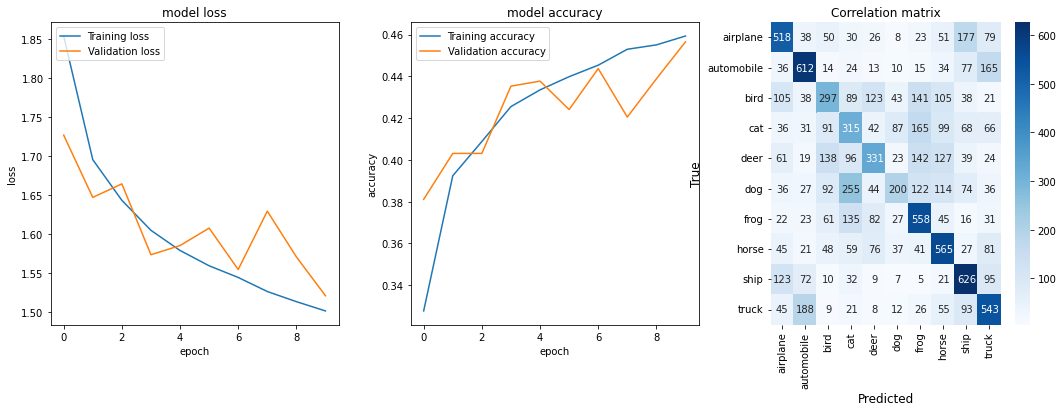

In [ ]:
#utilisation de predict et argmax car c'est un softmax
# la valeur retournée est un vecteur de probabilité, on retient la plus grande valeur pour la classe
predict_y=model1.predict(test_images) 
y_pred=np.argmax(predict_y,axis=1)


print ("\nRappel du modèle testé")
print (model1.summary(),'\n')

print("Accuracy sur le jeu de test", accuracy_score(test_labels, y_pred))

conf=confusion_matrix(test_labels,y_pred)
plot_curves_confusion (history,conf,class_names)

En effet, nous avons ici un simple reseau de neurones MLP(Multi Layer Perceptron). Nous constatons avec les courbes que l'apprentissage est encore loin d'être terminée. La fonction de perte sur les données de test ainsi que de validation continuent de baisser et l'accuracy augmente. Mais nous n'allons pas jouer sur le nombre epoch ou le batch-size ici. nous le verrons avec un CNN qu'on améliorera jusqu'à obtention des resultats escomptés.


<H3>Application de la cross validation pour un réel test de performance de ce réseau de neurones simpliste</H3>

In [ ]:
# Concaténation du jeu d'apprentissage et de test
inputs = np.concatenate((train_images, test_images), axis=0)
targets = np.concatenate((train_labels, test_labels), axis=0)

nb_folds=2
epochs=24
batch_size=64

kfold = KFold(n_splits=nb_folds, shuffle=True)

# Cross-validation 
fold_no = 1
acc_per_fold = []
loss_per_fold = []
for train, test in kfold.split(inputs, targets):

  # Definition de l'architecture du modèle
  
  model1 = models.Sequential()
  model1.add(layers.Flatten(input_shape=(32, 32, 3)))
  model1.add(layers.Dense(200, activation='relu'))
  model1.add(layers.Dense(500, activation='relu'))
  model1.add(layers.Dense(10, activation='softmax'))
  # Compilation du modèle 
  model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  print('\nEntrainement pour le fold  ', fold_no, ' ')

  # Fit data sur les données
  history = model1.fit(inputs[train], targets[train],
              validation_data=(test_images, test_labels),
              batch_size=batch_size,
              epochs=epochs)

  # Récupération des métriques (accuracy et loss)
  scores = model1.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score pour fold {fold_no} : {model1.metrics_names[0]} = {scores[0]} - {model1.metrics_names[1]} = {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Augmentation du nombre de folds
  fold_no = fold_no + 1

# Les scores 
print('Scores par fold :\n')
for i in range(0, len(acc_per_fold)):
  print(" \tFold ",i+1, "Accuracy : ",acc_per_fold[i],"% - Loss: ",loss_per_fold[i])
print('\nScores moyens pour tous les folds:')
print(f' \tAccuracy : {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f' \tLoss : {np.mean(loss_per_fold)}')
predict_y=model1.predict(test_images) 
y_pred=np.argmax(predict_y,axis=1)
conf=confusion_matrix(test_labels,y_pred)
plot_curves_confusion (history,conf,class_names)


Entrainement pour le fold   1  
Epoch 1/24
469/469 [==============================] - 4s 7ms/step - loss: 1.8866 - accuracy: 0.3140 - val_loss: 1.7855 - val_accuracy: 0.3512
Epoch 2/24
469/469 [==============================] - 3s 6ms/step - loss: 1.7176 - accuracy: 0.3836 - val_loss: 1.6634 - val_accuracy: 0.4012
Epoch 3/24
469/469 [==============================] - 3s 6ms/step - loss: 1.6388 - accuracy: 0.4148 - val_loss: 1.5841 - val_accuracy: 0.4369
Epoch 4/24
469/469 [==============================] - 2s 5ms/step - loss: 1.5756 - accuracy: 0.4342 - val_loss: 1.5701 - val_accuracy: 0.4446
Epoch 5/24
469/469 [==============================] - 2s 5ms/step - loss: 1.5279 - accuracy: 0.4557 - val_loss: 1.4985 - val_accuracy: 0.4684
Epoch 6/24
469/469 [==============================] - 2s 5ms/step - loss: 1.5052 - accuracy: 0.4640 - val_loss: 1.4828 - val_accuracy: 0.4754
Epoch 7/24
469/469 [==============================] - 3s 6ms/step - loss: 1.4680 - accuracy: 0.4765 - val_loss: 1.5

# Un modèle plus compliqué : modèle à convolution (CNN) Celui que nous améliorerons jusqu'à obtention d'un résultat correct utilsant plusieurs méthodes comme l'augmentation des données....

Dans cette section nous utilisons un modèle de CNN particulièrement bien adapté aux images.

Comme les images sont en niveau de gris, il manque une dimension (couleur RVB). Pour cela nous transformons les données de la manière suivante : 

In [ ]:
train_images = train_images_original.reshape(50000, 32, 32, 3)
test_images = test_images_original.reshape(10000, 32, 32, 3)

Contrairement au précédent, nous n'applatissons pas les données mais considérons que les données d'entrées sont bien de la forme 28x28 pixels (*input_shape*). Nous passons par l'intermédiaire d'une couche de convolution 2D qui est suivie par une maxPooling. Enfin nous applatissons (*Flatten*) la sortie du maxPooling et ajoutons une couche dense. La dernière couche, comme précédemment contient 10 neurones et une fonction de sortie softmax pour la classification multi-classes.

Epoch 1/50
782/782 [==============================] - 16s 9ms/step - loss: 1.7108 - accuracy: 0.3669 - val_loss: 1.4466 - val_accuracy: 0.4750
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 1.3984 - accuracy: 0.4931 - val_loss: 1.3024 - val_accuracy: 0.5369
Epoch 3/50
782/782 [==============================] - 7s 8ms/step - loss: 1.2804 - accuracy: 0.5419 - val_loss: 1.2488 - val_accuracy: 0.5578
Epoch 4/50
782/782 [==============================] - 7s 8ms/step - loss: 1.1955 - accuracy: 0.5749 - val_loss: 1.2076 - val_accuracy: 0.5707
Epoch 5/50
782/782 [==============================] - 7s 8ms/step - loss: 1.1314 - accuracy: 0.5981 - val_loss: 1.1225 - val_accuracy: 0.6021
Epoch 6/50
782/782 [==============================] - 7s 8ms/step - loss: 1.0729 - accuracy: 0.6203 - val_loss: 1.0798 - val_accuracy: 0.6194
Epoch 7/50
782/782 [==============================] - 7s 8ms/step - loss: 1.0211 - accuracy: 0.6402 - val_loss: 1.0441 - val_accuracy: 0.6356
Epoch

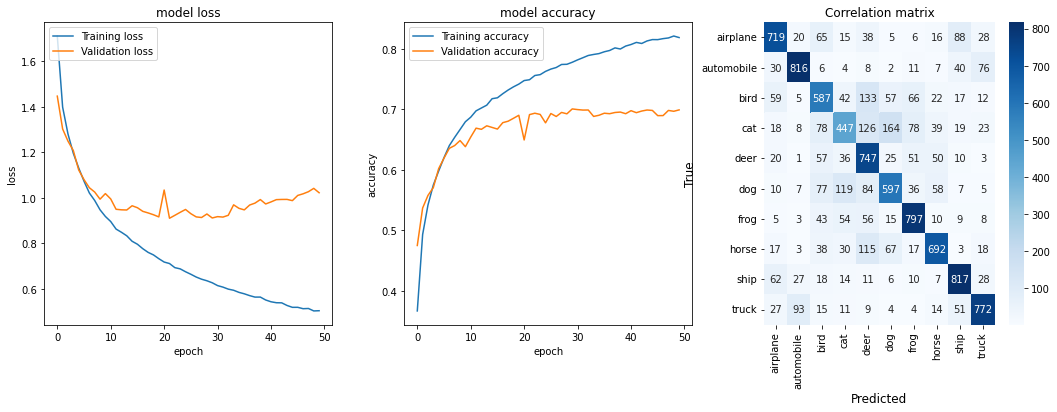

In [ ]:
cnnmodel = tf.keras.Sequential()
# 1 couche de convolution, avec nombre de filtres progressif 32
cnnmodel.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))
cnnmodel.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))
cnnmodel.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))

# remise à plat
cnnmodel.add(Flatten())
# Couche dense classique ANN
cnnmodel.add(Dense(100, activation='relu'))


# Couche de sortie (classes de 0 à 9)
cnnmodel.add(Dense(10, activation='softmax'))
cnnmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

epochs=50
batch_size=64
history=cnnmodel.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=epochs, batch_size=batch_size) 
predict_y=cnnmodel.predict(test_images) 
y_pred=np.argmax(predict_y,axis=1)
conf=confusion_matrix(test_labels,y_pred)
plot_curves_confusion (history,conf,class_names)

Nous constatons ici un surapprentissage(Overfitting). La différence entre les résultats sur les données d'entrainement et les données de test est énorme.

#Utilisation  du **dropout**, l'**augementation de données** ainsi que le **batch Normalisation** qui nous permettrons de prevenir En cas de début de overFitting avec le dropout, augmenter les données pour permettre au modèle d'apprendre plus et aussi la normalisation par lot pour la rapidité et la stabilité

170508288/170498071 [==============================] - 6s 0us/step
Epoch 1/400
782/782 [==============================] - 57s 56ms/step - loss: 2.1805 - accuracy: 0.2909 - val_loss: 1.4890 - val_accuracy: 0.4545
Epoch 2/400
782/782 [==============================] - 44s 56ms/step - loss: 1.6341 - accuracy: 0.4047 - val_loss: 1.5057 - val_accuracy: 0.4541
Epoch 3/400
782/782 [==============================] - 44s 56ms/step - loss: 1.4997 - accuracy: 0.4518 - val_loss: 1.3794 - val_accuracy: 0.4991
Epoch 4/400
782/782 [==============================] - 44s 56ms/step - loss: 1.4229 - accuracy: 0.4812 - val_loss: 1.3714 - val_accuracy: 0.4972
Epoch 5/400
782/782 [==============================] - 44s 56ms/step - loss: 1.3554 - accuracy: 0.5077 - val_loss: 1.3031 - val_accuracy: 0.5266
Epoch 6/400
782/782 [==============================] - 42s 54ms/step - loss: 1.3030 - accuracy: 0.5289 - val_loss: 1.2070 - val_accuracy: 0.5635
Epoch 7/400
782/782 [==============================] - 42s 53ms

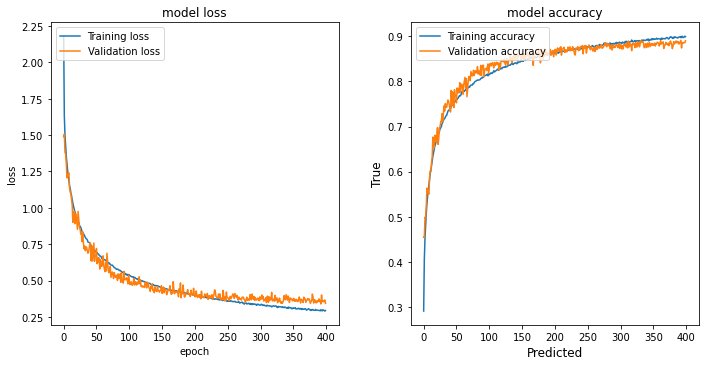

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
epochs= 400
batch_size=64
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(train_images, train_labels, batch_size=batch_size)
history = model.fit(it_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(test_images, test_labels))
#history=fashion_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=epochs, batch_size=batch_size) 
plt.figure(1,figsize=(16,6))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,
                          top = 0.9, wspace = 0.25, hspace = 0)
plt.subplot(1,3,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper left')
# graphique en position 2 - accuracy
plt.subplot(1,3,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.show()

Avec l'application des 3 méthodes sur les hyperparamètres citées ci-dessus, nous pouvons constater que les 2 courbes convergent sur les 2 graphiques. La prévention du overfitting ainsi que l'augmengtation des données d'apprentissage nous donnent de bons résultats. 

Cette fois ci il y a 542230 paramètres à appendre !

Le modèle par CNN obtient d'encore meilleurs résultats. 

Nous analysons les performances à l'aide d'une cross validation.


In [ ]:
# Concaténation du jeu d'apprentissage et de test
inputs = np.concatenate((train_images, test_images), axis=0)
targets = np.concatenate((train_labels, test_labels), axis=0)


# one hot encode target values
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#y
nb_folds = 2
epochs= 100
batch_size=64
kfold = KFold(n_splits=nb_folds, shuffle=True)

# Cross-validation 
fold_no = 1
acc_per_fold = []
loss_per_fold = []
for train, test in kfold.split(inputs, targets):

  # Definition de l'architecture du modèle
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  
  datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
  it_train = datagen.flow(train_images, train_labels, batch_size=batch_size)
  print('\nEntrainement pour le fold  ', fold_no, ' ')

  history = model.fit(it_train,batch_size=batch_size,epochs=epochs,verbose=1)

  # Récupération des métriques (accuracy et loss)
  scores = model.evaluate(test_images, test_labels, verbose=0)
  print(f'Score pour fold {fold_no} : {model.metrics_names[0]} = {scores[0]} - {model.metrics_names[1]} = {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Augmentation du nombre de folds
  fold_no = fold_no + 1
  #PREDICT
predict_y= model.predict(test_images, batch_size=64, verbose=0) 
y_pred=np.argmax(predict_y,axis=1)
test_labels = np.argmax(test_labels,axis=1)
# Les scores 
print('Scores par fold :\n')
for i in range(0, len(acc_per_fold)):
  print(" \tFold ",i+1, "Accuracy : ",acc_per_fold[i],"% - Loss: ",loss_per_fold[i])
print('\nScores moyens pour tous les folds:')
print(f' \tAccuracy : {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f' \tLoss : {np.mean(loss_per_fold)}')
print("Accuracy sur le jeu de test", accuracy_score(test_labels, y_pred))



Entrainement pour le fold   1  
Epoch 1/100
782/782 [==============================] - 51s 53ms/step - loss: 2.1435 - accuracy: 0.2896
Epoch 2/100
782/782 [==============================] - 42s 53ms/step - loss: 1.6276 - accuracy: 0.4078
Epoch 3/100
782/782 [==============================] - 42s 53ms/step - loss: 1.4939 - accuracy: 0.4486
Epoch 4/100
782/782 [==============================] - 42s 53ms/step - loss: 1.3962 - accuracy: 0.4893
Epoch 5/100
782/782 [==============================] - 42s 53ms/step - loss: 1.3200 - accuracy: 0.5208
Epoch 6/100
782/782 [==============================] - 42s 53ms/step - loss: 1.2640 - accuracy: 0.5412
Epoch 7/100
782/782 [==============================] - 42s 53ms/step - loss: 1.2197 - accuracy: 0.5623
Epoch 8/100
782/782 [==============================] - 42s 54ms/step - loss: 1.1863 - accuracy: 0.5709
Epoch 9/100
782/782 [==============================] - 42s 53ms/step - loss: 1.1484 - accuracy: 0.5880
Epoch 10/100
782/782 [==================


Rappel du modèle testé
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                              

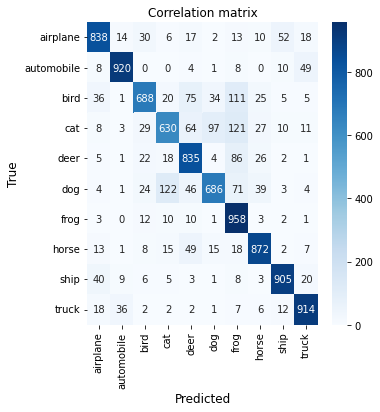

In [ ]:
#utilisation de predict_classes car c'est un softmax
#y_pred=model1.predict_classes(test_images) 
predict_y=model.predict(test_images) 
y_pred=np.argmax(predict_y,axis=1)

print ("\nRappel du modèle testé")
print (model.summary(),'\n')

print("Accuracy sur le jeu de test", accuracy_score(test_labels, y_pred))

conf=confusion_matrix(test_labels,y_pred)
plot_curves_confusion (history,conf,class_names)

Nous voyons qu'en faisant de la cross validation notre score est meilleur que le modèle précédent. Il peut bien entendu être encore amélioré.  Sur Fashion Mnist vous pouvez via des CNN obtenir assez facilement plus de 90% d'accuracy avec cross validation. 


### Sauvegarde et utilisation du modèle

Apprendre un modèle peut, comme nous l'avons vu, être très long ! Aussi une fois le modèle appris, il est important de le sauvegarder.  

**Rappel :** les expérimentations menées sont là pour voir si l'architecture définie nous donne un bon modèle. Par contre à chaque étape nous avons un jeu d'apprentissage et nous évaluons avec le jeu de test. Une fois ces expérimentations réalisées (et qui montrent que le modèle est performant), **il faut relancer le modèle avec tout le jeu de données avant de le sauvegarder**.  

De manière à ne pas générer un modèle trop gros sur le disque, nous ne considérons ici que les images d'entrainement (ici il aurait fallu concaténer *train_images* avec *test_images* et *train_labels* avec *test_labels*).   

L'apprentissage du modèle se fait tout simplement via fit :

In [ ]:
model.fit(train_images, train_labels, epochs=100, batch_size=64, verbose=0)

La sauvegarde du model 

In [ ]:
model.save('final_model.h5')

Chargement du modèle appris : 

In [ ]:
model_loaded = load_model('final_model.h5')


Il est maintenant possible de faire des prédictions. Comme le modèle sauvegardé n'a pas utilisé les images du jeu de test, nous pouvons les utiliser. 

In [ ]:
# prédiction avec le modèle chargé 
nb_images=15
predict_y=model_loaded.predict(test_images[0:nb_images]) 
y_pred=np.argmax(predict_y,axis=1)
y_pred.astype('int')
for i in range(0,len(y_pred)):
  print ("Classe réelle  ", class_names[test_labels[i]], " - classe prédite", class_names[int(y_pred[i])] )


Classe réelle   cat  - classe prédite cat
Classe réelle   ship  - classe prédite ship
Classe réelle   ship  - classe prédite ship
Classe réelle   airplane  - classe prédite ship
Classe réelle   frog  - classe prédite frog
Classe réelle   frog  - classe prédite frog
Classe réelle   automobile  - classe prédite truck
Classe réelle   frog  - classe prédite frog
Classe réelle   cat  - classe prédite cat
Classe réelle   automobile  - classe prédite automobile
Classe réelle   airplane  - classe prédite airplane
Classe réelle   truck  - classe prédite truck
Classe réelle   dog  - classe prédite dog
Classe réelle   horse  - classe prédite horse
Classe réelle   truck  - classe prédite truck
